---
## **`APM1111 - FA 6`**
#### **Author: Sean Angelo T. Lagua**
#### **Date: November 13, 2023**
#### **Output: Performing and Interpreting Student's t-test**
---

This data set, "Invisibility Cloak", provides the number of mischievous acts committed by two groups of people, those with and those without an invisibility cloak.

Variables:
- Participant - Identification number of a participant.
- Cloak - Experimental group (0 = without a cloak of invisibility, 1 = with a cloak of invisibility).
- Mischief - the number of mischievous acts committed by a participant.

### **Assumptions Checks**

**Assumption 1.** The dependent variable (Mischief) is continuous. <br>
**Assumption 2.** The independent variable (Cloak) consists of two categorical, independent groups (With a cloak, Without a cloak). <br>
**Assumption 3.** Each participant is present only in one group. <br>

In [224]:
import pandas as pd
import math

# Reading the csv file and turning it into a dataframe
data = pd.read_csv("Invisibility Cloak.csv")
data_frame = pd.DataFrame(data)

#### **Raincloud Plots**

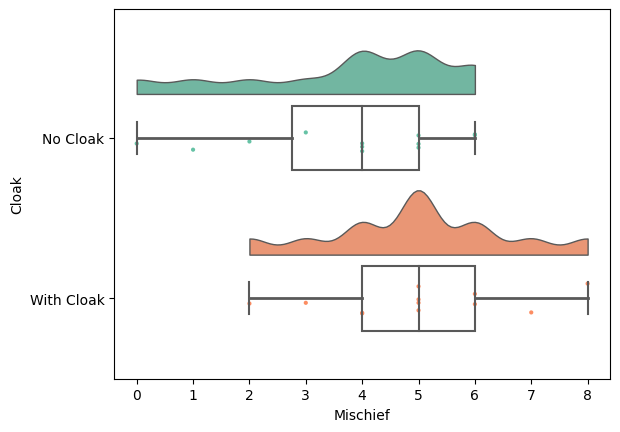

<Figure size 1200x800 with 0 Axes>

In [228]:
import ptitprince as pt
import matplotlib.pyplot as plt

# Replacing proper category names
data_frame['Cloak'] = data_frame['Cloak'].replace([0, 1], ['No Cloak', 'With Cloak'])

myBin = data_frame['Cloak']
myScale = data_frame['Mischief']

noCloakMischief = myScale[myBin == 'No Cloak'].dropna()
withCloakMischief = myScale[myBin == 'With Cloak'].dropna()

ax = pt.RainCloud(x = 'Cloak', y = 'Mischief', data = data_frame, width_viol= 0.8, width_box= 0.4, orient = 'h')
plt.figure(figsize = (12, 8))
plt.show()

**Assumption 4. Outliers.** There are no significant outliers in the two groups of independent variable (Cloak) in terms of the dependent variable (Mischief), as assessed by visual inspection of boxplots. <br>
**Assumption 5. Normality** The dependent variable (Mischief) for each group (Cloak) is normally distributed (p > 0.05), as assessed by Shapiro-Wilk test.

In [252]:
import scipy as sp

# Performing Shapiro-Wilk Test
shapiro_normality_no_cloak = sp.stats.shapiro(noCloakMischief)
shapiro_normality_cloak = sp.stats.shapiro(withCloakMischief)

normality_data = {'': ['No Cloak', 'With Cloak'],
                  'W': [shapiro_normality_no_cloak[0], shapiro_normality_no_cloak[0]],
                  'p': [shapiro_normality_no_cloak[1], shapiro_normality_no_cloak[1]]
                 }
normality_df = pd.DataFrame(normality_data, index=['Mischief', ''])

styles = [dict(selector="caption",
                       props=[("text-align", "Left"),
                              ("font-size", "120%"),
                              ("font-weight", "5em"),
                              ("font-style", "Italic")
                             ]
              )
         ]

normality_df.style.set_caption("Test for Normality (Shapiro-Wilk)").set_table_styles(styles)

,,W,p
Mischief,No Cloak,0.912764,0.231446
,With Cloak,0.912764,0.231446


**Assumption 6. Homogeneity.** There is equality of variances between groups (Without a cloak, With a cloak) on their number of mischievous acts (Mischief), as assessed by Levene’s test of equality of variances.

In [230]:
# Performing Levene's Test
levene_test = sp.stats.levene(noCloakMischief, withCloakMischief, center='mean')
df_between = 1

levene_data = {
    'F': [levene_test[0]],
    'df' : [df_between],
    'p' : [levene_test[1]]
}

levene_df = pd.DataFrame(levene_data, index=['Mischief'])
levene_df.style.set_caption("Test of Equality of Variances (Levene's)").set_table_styles(styles)

,F,df,p
Mischief,0.544892,1,0.468214


### **Computation**

In [251]:
from pingouin import ttest

# Performing Independent T-Test
mean_diff = myScale[myBin == 'No Cloak'].mean() - myScale[myBin == 'With Cloak'].mean()
se_diff = math.sqrt((sp.stats.sem(myScale[myBin == 'No Cloak'])**2) + (sp.stats.sem(myScale[myBin == 'With Cloak'])**2))
mischief_ttest = ttest(noCloakMischief, withCloakMischief, correction=False)

ind_ttest_data = {
    't' : [mischief_ttest.iloc[0]['T']],
    'df' : [mischief_ttest.iloc[0]['dof']],
    'p' : [mischief_ttest.iloc[0]['p-val']],
    'Mean Difference' : [mean_diff],
    'SE Difference' : [se_diff],
    'CI95%' : [mischief_ttest.iloc[0]['CI95%']]
}

ind_ttest_df = pd.DataFrame(ind_ttest_data, index=['Mischief'])
ind_ttest_df.style.set_caption("Independent Samples T-Test").set_table_styles(styles)

,t,df,p,Mean Difference,SE Difference,CI95%
Mischief,-1.713459,22,0.100686,-1.250000,0.729518,[-2.76 0.26]


This table shows the output for the independent samples Student t-test. Statistical significance is not evident between the differences of the group at the 0.5 level, thus we can proceed without rejecting the null hypothesis.

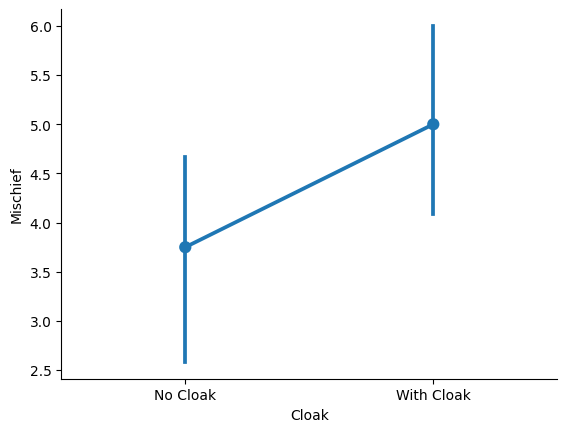

In [241]:
import seaborn as sns

# Descriptive confidence level plot between the two means of the groups
fig, axes = plt.subplots(1, 1)
sns.pointplot(x = 'Cloak', y = 'Mischief', data = data_frame)
sns.despine()

### **Null Hypothesis**

$$ H_{0}:\mu_{1} = \mu_{2} $$

There is no significant difference between With a Cloak or No Cloak at all on the number of mischievous acts that the participants performed.

### **Presenting the Results**

In a distant future with superb technological advancement, a group of 24 participants were divided equally into two and placed in an enclosed community. Hidden cameras were placed around the community to record their mischievous acts; half were given an invisibility cloak. In a span of a week, the gathered reveals that the number of mischievous acts between those who were given an invisibility cloak ($M =$ 5, $SD =$ 1.651, $n =$ 12) and those were not ($M =$ 3.75, $SD =$ 1.913, $n =$ 12) is relatively the same. That is, the invisibility cloak did not increase the likelihood of a person to commit more mischiefs. The difference, -1.25, BCa 95% CI [-2.50258, 0.00258] was not significant $t$(22) $=$ -1.713, $p =$ .101, d = 0.69.